In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
import alpaca_trade_api as tradeapi
from datetime import datetime

In [3]:
import os
os.chdir('../')
print(os.getcwd())

c:\Users\pehbo\projects\algo


In [4]:
# Replace with your own API key and secret
with open('secrets/secrets.json') as f:
    secrets = json.load(f)
API_KEY = secrets['KEY']
API_SECRET = secrets['SECRET']
BASE_URL = 'https://paper-api.alpaca.markets'  # For paper trading, use the paper trading URL

# Set up the Alpaca API client
api = tradeapi.REST(API_KEY, API_SECRET, base_url=BASE_URL, api_version='v2')


c:\Users\pehbo\anaconda3\envs\algo\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001423. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\pehbo\anaconda3\envs\algo\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1864815.6712872188
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3624.7226671965914
Iteration:      3,   Func. Count:     26,   Neg. LLF: -2958.602685726738
Iteration:      4,   Func. Count:     32,   Neg. LLF: -3154.7476960587614
Iteration:      5,   Func. Count:     38,   Neg. LLF: -1717.2123639554347
Iteration:      6,   Func. Count:     44,   Neg. LLF: -1652.900399014262
Iteration:      7,   Func. Count:     51,   Neg. LLF: 4461712242.516413
Iteration:      8,   Func. Count:     62,   Neg. LLF: 2694188409.077375
Iteration:      9,   Func. Count:     70,   Neg. LLF: -3313.5634248476795
Iteration:     10,   Func. Count:     77,   Neg. LLF: -1209.9043481862523
Iteration:     11,   Func. Count:     85,   Neg. LLF: -3315.2032645484132
Iteration:     12,   Func. Count:     90,   Neg. LLF: -2895.0927192467852
Iteration:     13,   Func. Count:     96,   Neg. LLF: -2997.216564020746
Iteration:     14,   Func. Count:    102,   Neg

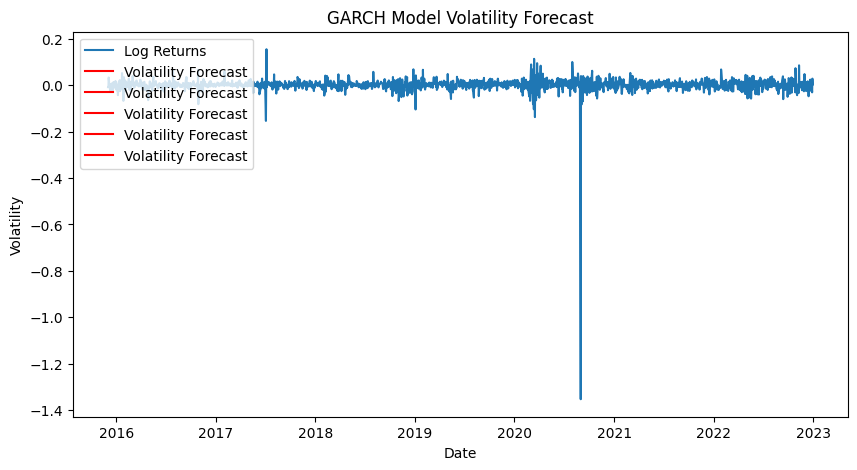

In [6]:
# Get historical data for the S&P 500 index (using the ETF 'SPY' as a proxy)
symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2022-12-31'
timeframe = '1D'

historical_data = api.get_bars(symbol, tradeapi.rest.TimeFrame.Day, start=start_date, end=end_date).df

# Calculate daily log returns
historical_data['Log_Returns'] = np.log(historical_data['close'] / historical_data['close'].shift(1))

# Fit GARCH model on the log returns
model = arch_model(historical_data['Log_Returns'].dropna(), vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Forecast the volatility
forecast = garch_fit.forecast(horizon=5)  # Forecast 5 days ahead
volatility_forecast = np.sqrt(forecast.variance.dropna())

# Plot the volatility forecast
plt.figure(figsize=(10, 5))
plt.plot(historical_data.index[1:], historical_data['Log_Returns'][1:], label='Log Returns')
plt.plot(volatility_forecast.index, volatility_forecast.values, label='Volatility Forecast', color='red')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('GARCH Model Volatility Forecast')
plt.show()
